In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def stringIndexer(attr):
    uni = list(df[attr].unique())
    inp = list(df[attr].to_numpy())
    out = []
    for x in inp:
        out.append(uni.index(x))
    return out

In [3]:
def multiStringIndexer(attrs):
    for x in attrs:
        df[x+'_index'] = pd.Series(stringIndexer(x),index=df.index)

In [4]:
df = pd.read_csv('avocado.csv')

In [5]:
multiStringIndexer(['type'])

In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,type_index
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0


In [7]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
df.rename(columns={
    '4046' : 'Small HASS sold',
    '4225' : 'Large HASS sold',
    '4770' : 'XLarge HASS sold',
},inplace=True)

In [9]:
df.describe()

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_index
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,0.499918
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,0.500014
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,1.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Date                18249 non-null object
AveragePrice        18249 non-null float64
Total Volume        18249 non-null float64
Small HASS sold     18249 non-null float64
Large HASS sold     18249 non-null float64
XLarge HASS sold    18249 non-null float64
Total Bags          18249 non-null float64
Small Bags          18249 non-null float64
Large Bags          18249 non-null float64
XLarge Bags         18249 non-null float64
type                18249 non-null object
year                18249 non-null int64
region              18249 non-null object
type_index          18249 non-null int64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
df.corr()

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_index
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.615845
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.232434
Small HASS sold,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.225819
Large HASS sold,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.232289
XLarge HASS sold,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.210027
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.217788
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.220535
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.193177
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.175483
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.000032


In [12]:
df.cov()

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_index
AveragePrice,0.162148,-2.680534e+05,-1.061128e+05,-8.384767e+04,-7.765213e+03,-7.032811e+04,-5.250081e+04,-1.698952e+04,-8.377831e+02,0.035274,0.123997
Total Volume,-268053.371641,1.192698e+13,4.271988e+12,4.051116e+12,3.237022e+11,3.280170e+12,2.492536e+12,7.419807e+11,4.565372e+10,55810.254638,-401372.405118
Small HASS sold,-106112.839423,4.271988e+12,1.600197e+12,1.410650e+12,1.132916e+11,1.147850e+12,8.733788e+11,2.588178e+11,1.565299e+10,3987.170132,-142832.915111
Large HASS sold,-83847.671587,4.051116e+12,1.410650e+12,1.449906e+12,1.148882e+11,1.075672e+12,8.230438e+11,2.379536e+11,1.467464e+10,-10818.947174,-139856.025268
XLarge HASS sold,-7765.212885,3.237022e+11,1.132916e+11,1.148882e+11,1.154853e+10,8.397392e+10,6.436905e+10,1.831222e+10,1.292654e+09,-3689.946549,-11285.503667
Total Bags,-70328.114110,3.280170e+12,1.147850e+12,1.075672e+12,8.397392e+10,9.726741e+11,7.317436e+11,2.268970e+11,1.403344e+10,66329.581266,-107399.001348
Small Bags,-52500.812494,2.492536e+12,8.733788e+11,8.230438e+11,6.436905e+10,7.317436e+11,5.567824e+11,1.643092e+11,1.065201e+10,44827.328787,-82281.586939
Large Bags,-16989.518346,7.419807e+11,2.588178e+11,2.379536e+11,1.831222e+10,2.268970e+11,1.643092e+11,5.951939e+10,3.068395e+09,20154.653415,-23564.969714
XLarge Bags,-837.783149,4.565372e+10,1.565299e+10,1.467464e+10,1.292654e+09,1.403344e+10,1.065201e+10,3.068395e+09,3.130385e+08,1347.598787,-1552.444503
year,0.035274,5.581025e+04,3.987170e+03,-1.081895e+04,-3.689947e+03,6.632958e+04,4.482733e+04,2.015465e+04,1.347599e+03,0.883484,-0.000015


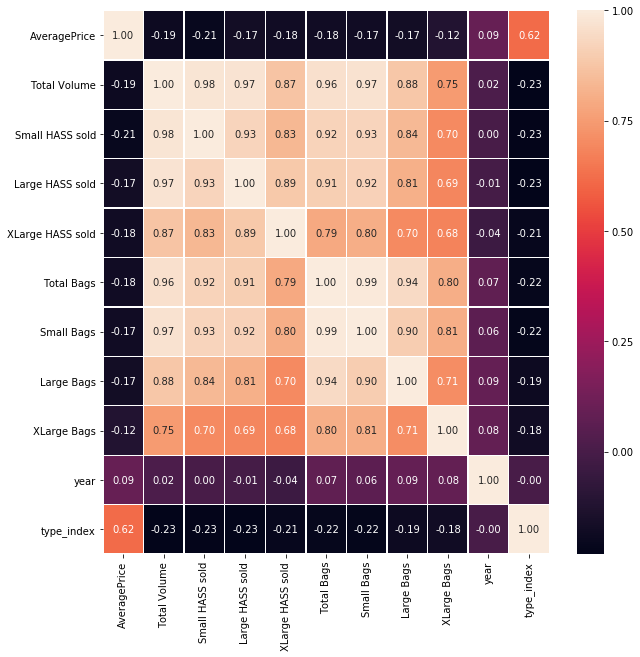

In [13]:
f,axis = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.4, fmt= '.2f',ax=axis)
plt.show()